In [1]:
import numpy as np
import pandas as pd
import pandas_profiling as pp
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# preprocessing
import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, learning_curve, ShuffleSplit
from sklearn.model_selection import cross_val_predict as cvp
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, explained_variance_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel, SelectKBest, RFE, chi2

# models
from sklearn.linear_model import LinearRegression, LogisticRegression, Perceptron, RidgeClassifier, SGDClassifier, LassoCV
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier 
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
import xgboost as xgb
from xgboost import XGBClassifier
import lightgbm as lgb
from lightgbm import LGBMClassifier

# NN models
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# pip install pytorch_tabnet

In [3]:
from pytorch_tabnet.tab_model import TabNetClassifier

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

In [5]:
df = pd.read_csv("../data/chipVariantCalling_run1.tsv", sep='\t')
df2 = pd.read_csv("../data/chipVariantCalling_run2.tsv", sep='\t')

df

,d.barcode,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,MSID,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
1,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
2,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
3,4010289633,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,MS2083,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
4,4010289633,7282,29,0.004000,0.003600,MODERATE,GNB1,chr1:1747250_T/C,Baseline,Male,MS2083,2:2,3639:3606,15:14,32.700000,1.061729,CHIP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137944,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848011_C/T,Blank,Blank,NaN,2:2,371:357,1:1,31.000000,1.039170,NaN
1137945,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN
1137946,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN
1137947,4010290016,731,2,0.002700,0.002800,MODERATE,ZFY,chrY:2848029_C/T,Blank,Blank,NaN,2:2,367:359,1:1,37.000000,1.022260,NaN


In [6]:
dataset1 = pd.read_csv("../data/chipVariantCalling_run1.tsv", sep='\t')
dataset2 = pd.read_csv("../data/chipVariantCalling_run2.tsv", sep='\t')

unknown1 = dataset1[(dataset1.chipOrControl == "Unknown")]
unknown2 = dataset2[(dataset2.chipOrControl == "Unknown")]

Drop columns

In [7]:
df = df[(df.chipOrControl != "Blank") & (df.chipOrControl != "Unknown")]
df = df.dropna(subset=['chipOrControl'])
df.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
# df.drop(['sampleTimePt'], axis = 1, inplace=True)

df2 = df2[(df2.chipOrControl != "Blank") & (df2.chipOrControl != "Unknown")]
df2 = df2.dropna(subset=['chipOrControl'])
df2.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
# df2.drop(['sampleTimePt'], axis = 1, inplace=True)

In [8]:
unknown1 = unknown1[(unknown1.chipOrControl != "Blank") & (unknown1.chipOrControl != "Unknown")]
unknown1 = unknown1.dropna(subset=['chipOrControl'])
unknown1.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
# unknown1.drop(['sampleTimePt'], axis = 1, inplace=True)

unknown2 = unknown2[(unknown2.chipOrControl != "Blank") & (unknown2.chipOrControl != "Unknown")]
unknown2 = unknown2.dropna(subset=['chipOrControl'])
unknown2.drop(['MSID', 'd.barcode'], axis=1, inplace=True)
# unknown2.drop(['sampleTimePt'], axis = 1, inplace=True)

Store names of all genes

In [9]:
genes = df.SYMBOL.unique()
genes2 = df2.SYMBOL.unique()

In [10]:
df.head(3)

,DP,VD,AF,HIAF,IMPACT,SYMBOL,loci,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
1,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.000000,1.182210,CHIP
2,7281,26,0.003600,0.003300,MODERATE,GNB1,chr1:1747196_T/C,Baseline,Male,2:2,3644:3596,12:14,34.000000,1.182210,CHIP


Separate `loci` into three separate columns: `chromosome` | `chromosome_location` | `nucleotide`

In [11]:
import re

In [12]:
chromosome = []
chromosome_location = []
nucleotide = []

for location_string in df.loci.array:
    separated = re.split(r"[:_]+", location_string)
    chromosome.append(separated[0])
    chromosome_location.append(separated[1])
    nucleotide.append(separated[2])

df['chromosome'] = pd.Series(chromosome).values
df['chromosome_loc'] = pd.Series(chromosome_location).values
df['nucleotide'] = pd.Series(nucleotide).values
df.drop(['loci'],axis=1, inplace=True)

In [13]:
chromosome = []
chromosome_location = []
nucleotide = []

for location_string in df2.loci.array:
    separated = re.split(r"[:_]+", location_string)
    chromosome.append(separated[0])
    chromosome_location.append(separated[1])
    nucleotide.append(separated[2])
    
df2['chromosome'] = pd.Series(chromosome).values
df2['chromosome_loc'] = pd.Series(chromosome_location).values
df2['nucleotide'] = pd.Series(nucleotide).values
df2.drop(['loci'],axis=1, inplace=True)

Columns `BIAS`, `REFBIAS` and `VARBIAS` are strings. Change to floats.

In [14]:
def ratio_to_int(string):
    a, b = string.split(":")
    if int(b) == 0:
        return 0
    else:
        return int(a) / int(b)

In [15]:
# bias = []
refbias = []
varbias = []

# for ratio in df.BIAS.array:
#     bias.append(ratio_to_int(ratio)) 

for ratio in df.REFBIAS.array:
    refbias.append(ratio_to_int(ratio)) 

for ratio in df.VARBIAS.array:
    varbias.append(ratio_to_int(ratio)) 
    
# bias = pd.Series(bias)
refbias = pd.Series(refbias)
varbias = pd.Series(varbias)

# df['BIAS'] = bias.values
df['REFBIAS'] = refbias.values
df['VARBIAS'] = varbias.values

In [16]:
# bias = []
refbias = []
varbias = []

# for ratio in df2.BIAS.array:
#     bias.append(ratio_to_int(ratio)) 

for ratio in df2.REFBIAS.array:
    refbias.append(ratio_to_int(ratio)) 

for ratio in df2.VARBIAS.array:
    varbias.append(ratio_to_int(ratio)) 
    
# bias = pd.Series(bias)
refbias = pd.Series(refbias)
varbias = pd.Series(varbias)

# df2['BIAS'] = bias.values
df2['REFBIAS'] = refbias.values
df2['VARBIAS'] = varbias.values

Run Nick's code. I believe it changes data types to numerics

In [17]:
objs = {}
lst = []
for i in df.columns:
    if df.dtypes[i] == object:
        if len(df[f"{i}"].unique()) <= 100:
            objs[i] = len(df[f"{i}"].unique())
            lst.append(i)

In [18]:
objs = {}
lst = []
for i in df2.columns:
    if df2.dtypes[i] == object:
        if len(df2[f"{i}"].unique()) <= 100:
            objs[i] = len(df2[f"{i}"].unique())
            lst.append(i)

In [19]:
for i in lst:
    k = i
    dict = {}
    df_new = df
    for ix, i in zip(range(len(df_new[i].unique())), df_new[i].unique() ):
        dict[i] = ix
    df = df.replace({f"{k}": dict})
    df[f"{k}"] = df[f"{k}"].astype(str).astype(float)

In [20]:
for i in lst:
    k = i
    dict = {}
    df2_new = df2
    for ix, i in zip(range(len(df2_new[i].unique())), df2_new[i].unique() ):
        dict[i] = ix
    df2 = df2.replace({f"{k}": dict})
    df2[f"{k}"] = df2[f"{k}"].astype(str).astype(float)

In [21]:
# LOCI not required in final model
df.drop(['chromosome_loc'], axis=1, inplace=True)
df2.drop(['chromosome_loc'], axis=1, inplace=True)

In [22]:
# LOCI not required in final model
df.drop(['chromosome', 'nucleotide'], axis=1, inplace=True)
df2.drop(['chromosome', 'nucleotide'], axis=1, inplace=True)

In [23]:
df.drop_duplicates(inplace=True)
df2.drop_duplicates(inplace=True)
df

,DP,VD,AF,HIAF,IMPACT,SYMBOL,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl
0,7281,26,0.003600,0.003300,0.000000,0.000000,0.000000,0.000000,0.000000,1.013348,0.857143,34.000000,1.182210,0.000000
4,7282,29,0.004000,0.003600,0.000000,0.000000,0.000000,0.000000,0.000000,1.009151,1.071429,32.700000,1.061729,0.000000
8,7282,24,0.003300,0.003300,0.000000,0.000000,0.000000,0.000000,0.000000,1.005268,1.000000,34.900000,1.005270,0.000000
12,178,2,0.011200,0.012000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,37.000000,1.000000,0.000000
13,1773,6,0.003400,0.003500,0.000000,1.000000,0.000000,0.000000,0.000000,1.017162,1.000000,37.000000,1.017150,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536717,711,4,0.005600,0.005700,0.000000,28.000000,1.000000,1.000000,0.000000,1.008523,1.000000,37.000000,1.008510,1.000000
536725,711,2,0.002800,0.002800,0.000000,28.000000,1.000000,1.000000,0.000000,1.008499,1.000000,31.000000,1.008490,1.000000
536733,711,2,0.002800,0.002900,1.000000,28.000000,1.000000,1.000000,0.000000,1.005666,1.000000,37.000000,1.005660,1.000000
536734,711,2,0.002800,0.002900,0.000000,28.000000,1.000000,1.000000,0.000000,1.008499,1.000000,37.000000,1.008490,1.000000


### ONE HOT ENCODE "SYMBOL" with pd.get_dummies()

In [24]:
df_model = pd.concat([df,pd.get_dummies(df['SYMBOL'], prefix='GENE')],axis=1)
df_model2 = pd.concat([df2,pd.get_dummies(df2['SYMBOL'], prefix='GENE')],axis=1)

In [25]:
df_model.drop(['SYMBOL'],axis=1, inplace=True)
df_model2.drop(['SYMBOL'],axis=1, inplace=True)

In [26]:
dummy_genes = df_model.columns[15:]
dummy_genes2 = df_model2.columns[15:]

d = {}
d2 = {}

for i in range(len(dummy_genes)):
    d[dummy_genes[i]] = genes[i]

for i in range(len(dummy_genes2)):
    d2[dummy_genes2[i]] = genes2[i]

In [27]:
df_model = df_model.rename(d, axis=1)  # Renaming columns
df_model2 = df_model2.rename(d2, axis=1)  # Renaming columns

### Retain top 5 genes

In [28]:
# Remove other genes from dataframe
df_model = df_model[['DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

df_model2 = df_model2[['DP', 'VD', 'AF', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]


# Create separate dataframe
encoder = df_model[['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]
encoder2 = df_model2[['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR']]

# Sum of one hot encode. Value = 1 if exists, 0 otherwise
p = encoder[list(encoder)].sum(axis=1).array
p2 = encoder2[list(encoder2)].sum(axis=1).array

# Flip values
for i in range(len(p)):
    if p[i] == 0:
        p[i] = 1
    else:
        p[i] = 0

# Flip values
for i in range(len(p2)):
    if p2[i] == 0:
        p2[i] = 1
    else:
        p2[i] = 0
        
# Add to df
df_model["other"] = p
df_model2["other"] = p2

# One hot encode `BIAS`

In [29]:
# bias_str = ["twotwo", "onezero", "zerotwo", "onetwo", "twozero", "oneone", "zerozero", "twoone"]
# bias_str2 = ["twotwo", "twozero", "onezero", "zerotwo", "oneone", "twoone", "onetwo", "zerozero"]

# df_model = pd.concat([df_model, pd.get_dummies(df_model['BIAS'])],axis=1)
# df_model2 = pd.concat([df_model2, pd.get_dummies(df_model2['BIAS'])],axis=1)

In [30]:
# dummy_bias = pd.concat([df,pd.get_dummies(df['BIAS'])],axis=1).columns[14:]


# b = {}
# b2 = {}

# for i in range(len(dummy_bias)):
#     b[dummy_bias[i]] = bias_str[i]

# for i in range(len(dummy_bias)):
#     b2[dummy_bias[i]] = bias_str2[i]

In [31]:
# df_model.drop(['BIAS'],axis=1, inplace=True)
# df_model2.drop(['BIAS'],axis=1, inplace=True)

In [32]:
# df_model = df_model.rename(b, axis=1)  # Renaming columns
# df_model2 = df_model2.rename(b2, axis=1)  # Renaming columns

# Create closed datasets
- Remove rows in relation to outliers
- Compare values at the 98th percentile
- Reject QUAL values less than 30

In [33]:
print(df_model.ODDRATIO.quantile(0.98))
print(df_model.REFBIAS.quantile(0.98))
print(df_model.VARBIAS.quantile(0.98))

print(df_model.ODDRATIO.quantile(0.99))
print(df_model.REFBIAS.quantile(0.99))
print(df_model.VARBIAS.quantile(0.99))

print()

print(df_model2.ODDRATIO.quantile(0.98))
print(df_model2.REFBIAS.quantile(0.98))
print(df_model2.VARBIAS.quantile(0.98))

print(df_model2.ODDRATIO.quantile(0.99))
print(df_model2.REFBIAS.quantile(0.99))
print(df_model2.VARBIAS.quantile(0.99))

2.0372048
1.0690527335697206
1.5
2.0983787999999985
54.97636363636279
2.0

14.7623265426631
1.1422222626258425
11.289523809523661
18.541455123750726
12.266153846148743
14.566349206349095


The results above display the second dataset contains more noise IF ratios are examined as quantitative values

In [34]:
low_odd = df_model[df_model['ODDRATIO'] < 3]
low_odd_refbias = low_odd[low_odd['REFBIAS'] < 1.3]
low_odd_refbias_varbias = low_odd_refbias[low_odd_refbias['VARBIAS'] <= 2]
df_model_removed = low_odd_refbias_varbias[low_odd_refbias_varbias['QUAL'] >= 30]
# df_model_removed = df_model_removed[df_model_removed['DP'] >= ]

low_odd = df_model2[df_model2['ODDRATIO'] < 3]
low_odd_refbias = low_odd[low_odd['REFBIAS'] < 1.3]
low_odd_refbias_varbias = low_odd_refbias[low_odd_refbias['VARBIAS'] <= 2]
df_model_removed2 = low_odd_refbias_varbias[low_odd_refbias_varbias['QUAL'] >= 30]
# df_model_removed = df_model_removed[df_model_removed['DP'] >= 30]

#### Drop AF due to high correlation with HIAF. Drop duplicate rows

In [35]:
df_model.drop('AF', axis = 1, inplace = True)
df_model2.drop('AF', axis = 1, inplace = True)
df_model_removed.drop('AF', axis = 1, inplace = True)
df_model_removed2.drop('AF', axis = 1, inplace = True)

In [36]:
df_model.drop_duplicates(inplace=True)
df_model2.drop_duplicates(inplace=True)
df_model_removed.drop_duplicates(inplace=True)
df_model_removed2.drop_duplicates(inplace=True)

In [37]:
df_model_removed.describe()

,DP,VD,HIAF,IMPACT,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
count,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000,102604.000000
mean,5867.196308,109.637655,0.010700,0.053702,0.521880,0.481979,0.069432,0.986892,0.978736,35.722231,1.019106,0.446873,0.001764,0.018995,0.037767,0.006549,0.020155,0.914769
std,13124.963334,2004.422850,0.065289,0.225429,0.499523,0.499678,0.474893,0.186432,0.213639,1.877877,0.228002,0.497172,0.041964,0.136509,0.190632,0.080664,0.140532,0.279226
min,2.000000,2.000000,0.001900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,556.000000,2.000000,0.002800,0.000000,0.000000,0.000000,0.000000,1.012594,1.000000,35.000000,1.013130,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1270.000000,4.000000,0.003500,0.000000,1.000000,0.000000,0.000000,1.019914,1.000000,37.000000,1.022420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,5412.500000,17.000000,0.005300,0.000000,1.000000,1.000000,0.000000,1.028400,1.000000,37.000000,1.037590,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,455487.000000,146473.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.295203,2.000000,37.000000,2.977520,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Normalise Data
Create new dataframes to be trained/tested within models by normalising quantitative variables

In [38]:
df_model_removed2

,DP,VD,HIAF,IMPACT,sampleTimePt,gender,BIAS,REFBIAS,VARBIAS,QUAL,ODDRATIO,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
0,2036,6,0.004400,0.000000,0.000000,0.000000,0.000000,0.957230,1.000000,35.000000,1.044670,0.000000,0,0,0,0,0,1
5,2036,7,0.003500,1.000000,0.000000,0.000000,0.000000,0.988224,0.750000,35.300000,1.317450,0.000000,0,0,0,0,0,1
9,2040,5,0.002100,1.000000,0.000000,0.000000,0.000000,0.988166,0.666667,31.800000,1.481960,0.000000,0,0,0,0,0,1
13,2041,6,0.002500,1.000000,0.000000,0.000000,0.000000,0.983415,1.000000,32.700000,1.016860,0.000000,0,0,0,0,0,1
17,2037,5,0.002800,1.000000,0.000000,0.000000,0.000000,0.894942,0.666667,32.200000,1.342210,0.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692971,2130,9,0.003800,1.000000,1.000000,1.000000,0.000000,0.915913,1.250000,34.100000,1.364554,1.000000,0,0,0,0,1,0
692986,2076,6,0.002900,1.000000,1.000000,1.000000,1.000000,0.824007,0.000000,35.400000,0.000000,1.000000,0,0,0,0,1,0
692993,2069,7,0.003500,1.000000,1.000000,1.000000,1.000000,0.747064,0.000000,35.900000,0.000000,1.000000,0,0,0,0,1,0
693021,4805,13,0.002700,1.000000,1.000000,1.000000,0.000000,1.000839,0.857143,35.000000,1.167610,1.000000,0,0,0,0,1,0


In [39]:
def normalise(dataframe):
    norms = dataframe[['DP', 'VD', 'HIAF', 'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO']]
    norms = (norms-norms.mean())/norms.std()
#     norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
#                                            'BCOR', 'other', 'twotwo', 'onezero', 'zerotwo', 'onetwo', 'twozero',
#                                          'oneone', 'zerozero', 'twoone'] ]],axis=1)
    
    norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
                                       'BCOR', 'other'] ]],axis=1)
    
    return norms 

In [40]:
norm_df_model = normalise(df_model)
norm_df_model2 = normalise(df_model2)
norm_df_model_removed = normalise(df_model_removed)
norm_df_model_removed2 = normalise(df_model_removed2)

In [41]:
norm_df_model

,DP,VD,HIAF,REFBIAS,VARBIAS,QUAL,ODDRATIO,IMPACT,sampleTimePt,gender,chipOrControl,DNMT3A,TET2,TP53,ASXL1,BCOR,other
0,0.111750,-0.039057,-0.111933,-0.040965,-0.058840,-0.478556,-0.010949,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
4,0.111826,-0.038046,-0.107488,-0.040976,0.036889,-0.970238,-0.013579,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
8,0.111826,-0.039731,-0.111933,-0.040987,0.004980,-0.138160,-0.014812,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
12,-0.424884,-0.047143,0.016982,-0.041001,0.004980,0.656097,-0.014927,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
13,-0.304381,-0.045796,-0.108970,-0.040954,0.004980,0.656097,-0.014552,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536717,-0.384615,-0.046469,-0.076370,-0.040978,0.004980,0.656097,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536725,-0.384615,-0.047143,-0.119342,-0.040978,0.004980,-1.613208,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536733,-0.384615,-0.047143,-0.117860,-0.040986,0.004980,0.656097,-0.014803,1.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0
536734,-0.384615,-0.047143,-0.117860,-0.040978,0.004980,0.656097,-0.014741,0.000000,1.000000,1.000000,1.000000,0,0,0,0,1,0


# 2nd May Workings

In [42]:
df_model.columns

Index(['DP', 'VD', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl', 'DNMT3A',
       'TET2', 'TP53', 'ASXL1', 'BCOR', 'other'],
      dtype='object')

In [43]:
df_model.drop(['DNMT3A', 'TET2', 'TP53', 'ASXL1', 'BCOR', 'other'], axis=1 , inplace=True)

In [44]:
df_model.drop(['QUAL', 'BIAS', 'VARBIAS', 'IMPACT'], axis=1 , inplace=True)

In [45]:
df_other = df_model[df_model['DP'] > 10]
df_other = df_other[df_other['ODDRATIO'] < 1.5]
df_other = df_other[df_other['REFBIAS'] < 2]

In [46]:
df_other = df_other[df_other['HIAF'] < 0.027]

In [47]:
def normalise(dataframe):
    norms = dataframe[['DP', 'VD', 'HIAF', 'REFBIAS', 'ODDRATIO']]
    norms = (norms-norms.mean())/norms.std()
#     norms = pd.concat([norms, dataframe[['IMPACT', 'sampleTimePt', 'gender', 'chipOrControl', 'DNMT3A', 'TET2', 'TP53', 'ASXL1',
#                                            'BCOR', 'other', 'twotwo', 'onezero', 'zerotwo', 'onetwo', 'twozero',
#                                          'oneone', 'zerozero', 'twoone'] ]],axis=1)
    
    norms = pd.concat([norms, dataframe[['sampleTimePt', 'gender', 'chipOrControl'] ]],axis=1)
    
    return norms 

In [48]:
df_other1 = normalise(df_other)

# Data

In [49]:
X = df_model.drop('chipOrControl', axis = 1) 
y = df_model['chipOrControl'] 

X_other = df_other.drop('chipOrControl', axis = 1) 
y_other = df_other['chipOrControl'] 

X_other1 = df_other1.drop('chipOrControl', axis = 1) 
y_other1 = df_other1['chipOrControl'] 


X_2 = df_model2.drop('chipOrControl', axis = 1) 
y_2 = df_model2['chipOrControl'] 

norm_X = norm_df_model.drop('chipOrControl', axis = 1) 
norm_y = norm_df_model['chipOrControl'] 

norm_X_2 = norm_df_model2.drop('chipOrControl', axis = 1) 
norm_y_2 = norm_df_model2['chipOrControl']

removed_X = df_model_removed.drop('chipOrControl', axis = 1) 
removed_y = df_model_removed['chipOrControl'] 

removed_X_2 = df_model_removed2.drop('chipOrControl', axis = 1) 
removed_y_2 = df_model_removed2['chipOrControl'] 

norm_removed_X = norm_df_model_removed.drop('chipOrControl', axis = 1) 
norm_removed_y = norm_df_model_removed['chipOrControl'] 

norm_removed_X_2 = norm_df_model_removed2.drop('chipOrControl', axis = 1) 
norm_removed_y_2 = norm_df_model_removed2['chipOrControl'] 

# Random Forests
Run a random forest classifer, training/testing on individual datasets

#### Dataset 1

In [50]:
# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.64


In [51]:
# Split into training/testing
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size=.8, random_state=0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(n_estimators = 100)
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.641


#### Dataset 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(y, run2_pred),3)))

#### Dataset 1 filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(removed_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(removed_y_2, run2_pred),3)))

#### Dataset 2 filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X_2, removed_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(removed_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(removed_y, run2_pred),3)))

#### Normalised Dataset 1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_y_2, run2_pred),3)))

#### Normalised Datset 2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_X_2, norm_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_y, run2_pred),3)))

#### Normalised Dataset 1 Filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_removed_X, norm_removed_y, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_removed_X_2)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_removed_y_2, run2_pred),3)))

#### Normalised Dataset 2 Filtered

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(norm_removed_X_2, norm_removed_y_2, train_size=.8, random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  # calculate the predicted values
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

run2_pred = clf.predict(norm_removed_X)
print('Accuracy out of sample {0}'.format(np.round(accuracy_score(norm_removed_y, run2_pred),3)))

## Random Forests Tuning Hyperparameters

In [67]:
X = df_model.drop('chipOrControl', axis = 1) # drop the target variable for the features
y = df_model['chipOrControl'] # create a target dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

In [71]:
random_forest = RandomForestClassifier()
param_grid = {'n_estimators': [100, 200], 'min_samples_split': [2, 40], 'min_samples_leaf': [1, 5, 10], 
              'max_features': ['auto'], 'max_depth': ['None', 3, 5], 'criterion': ['gini'], 'bootstrap': [False]}

random_forest_CV = GridSearchCV(estimator=random_forest, param_grid=param_grid, verbose=2, n_jobs = -1) 
random_forest_CV.fit(X_train,y_train)



Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  5.8min finished


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'criterion': ['gini'],
                         'max_depth': ['None', 3, 5], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 40],
                         'n_estimators': [100, 200]},
             verbose=2)

In [72]:
print(random_forest_CV.best_params_)

{'bootstrap': False, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 5, 'min_samples_split': 40, 'n_estimators': 100}


In [ ]:
print(random_forest_CV.best_params_)

In [ ]:
y_pred = random_forest_CV.predict(X_test)

In [ ]:
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

In [73]:
# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier(max_depth = 5, min_samples_leaf = 5, min_samples_split = 40, n_estimators = 100, criterion ='gini')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.558


In [ ]:
run2_pred = clf.predict(X_2)
print('Accuracy {0}'.format(np.round(accuracy_score(y_2, run2_pred),3)))

# ADA

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=300, learning_rate = 1.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.668


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier(),
    n_estimators=100, learning_rate = 0.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.698


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    RandomForestClassifier(),
    n_estimators=100, learning_rate = 0.5, algorithm= 'SAMME')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

MemoryError: could not allocate 3670016 bytes

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

clf = AdaBoostClassifier(
    DecisionTreeClassifier())
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.661


In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]
}

gs_ab = GridSearchCV(AdaBoostClassifier(), param_grid = param_grid, n_jobs = -1, verbose = 3)
gs_ab.fit(X, y)
print(gs_ab.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  8.2min finished


{'learning_rate': 0.001, 'n_estimators': 100}


#### Constants

In [52]:
# Splitting train data for model tuning with cross-validation
cv_n_split = 3
random_state = 40
test_train_split_part = 0.2

cv_train = ShuffleSplit(n_splits=cv_n_split, test_size=test_train_split_part, random_state=random_state)

# Extra Trees

In [ ]:
# Extra Trees Classifier

etr = ExtraTreesClassifier()
etr_CV = GridSearchCV(estimator=etr, param_grid={'min_samples_leaf' : [11, 12, 13, 14]}, cv=cv_train, verbose=3)
etr_CV.fit(X, y)
print(etr_CV.best_params_)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
etr = etr = ExtraTreesClassifier()
etr.fit(X_train, y_train)
y_pred = etr.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.616


# MLP

In [ ]:
%%time
# MLPClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

mlp = MLPClassifier()
param_grid = {'solver': ['sgd', 'adam', 'lbfgs'],
              'learning_rate': ['adaptive', "constant", "invscaling"],
              }
mlp_GS = GridSearchCV(mlp, param_grid=param_grid, cv=cv_train, verbose=True)
mlp_GS.fit(X, y)
print(mlp_GS.best_params_)

In [180]:
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

mlp = MLPClassifier(solver = "adam", learning_rate = "adaptive", max_iter = 1000, verbose = 3)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Iteration 1, loss = 0.68689802
Iteration 2, loss = 0.68524797
Iteration 3, loss = 0.68453962
Iteration 4, loss = 0.68426255
Iteration 5, loss = 0.68396845
Iteration 6, loss = 0.68365895
Iteration 7, loss = 0.68351132
Iteration 8, loss = 0.68333855
Iteration 9, loss = 0.68324809
Iteration 10, loss = 0.68302496
Iteration 11, loss = 0.68291267
Iteration 12, loss = 0.68273190
Iteration 13, loss = 0.68281416
Iteration 14, loss = 0.68262919
Iteration 15, loss = 0.68249919
Iteration 16, loss = 0.68253650
Iteration 17, loss = 0.68229823
Iteration 18, loss = 0.68225924
Iteration 19, loss = 0.68210387
Iteration 20, loss = 0.68202674
Iteration 21, loss = 0.68200100
Iteration 22, loss = 0.68194629
Iteration 23, loss = 0.68189977
Iteration 24, loss = 0.68181860
Iteration 25, loss = 0.68168505
Iteration 26, loss = 0.68164373
Iteration 27, loss = 0.68173550
Iteration 28, loss = 0.68168649
Iteration 29, loss = 0.68157855
Iteration 30, loss = 0.68143427
Iteration 31, loss = 0.68142528
Iteration 32, los

In [ ]:
# Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(norm_X, norm_y, train_size=.8, random_state=0)

gaussian = GaussianNB()
param_grid={'var_smoothing': [1e-4, 1e-5, 1e-6, 1e-9]}
gaussian_CV = GridSearchCV(estimator=gaussian, param_grid=param_grid, cv=cv_train, verbose=3)
gaussian_CV.fit(X_train, y_train)
print(gaussian_CV.best_params_)

In [178]:
# Thanks to https://www.kaggle.com/skrudals/modification-of-neural-network-around-90
def build_nn(optimizer='adam'):

    # Initializing the NN
    nn = Sequential()

    # Adding the input layer and the first hidden layer of the NN
    nn.add(Dense(units=32, kernel_initializer='he_normal', activation='relu', input_shape=(len(X.columns),)))
    # Adding the output layer
    nn.add(Dense(units=1, kernel_initializer='he_normal', activation='sigmoid'))

    # Compiling the NN
    nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    return nn

Xtrain, Xval, Ztrain, Zval = train_test_split(norm_X, norm_y, test_size=0.2, random_state=0)
nn_model = build_nn(optimizers.Adam(lr=0.0001))
nn_model.fit(Xtrain, Ztrain, batch_size=16, epochs=15, validation_data=(Xval, Zval))

Epoch 1/15


ValueError: in user code:

    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Johnn\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -1 of input shape to have value 7 but received input with shape (None, 16)


# KNN - 74% Accuracy

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

knn = KNeighborsClassifier()
knn_CV = GridSearchCV(estimator=knn, param_grid={'weights': ['distance'], 
                                                 'metric': ['manhattan', ], 
                                                 'algorithm': ['kd_tree'],
                                                'n_neighbors': [5,7,9]}, 
                                    cv=cv_train, verbose=3, n_jobs = -1).fit(X, y)
print(knn_CV.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   9 | elapsed:   10.4s remaining:    5.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:   12.6s finished


{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.736


In [133]:
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size=.8, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 10, weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.741


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X_other1, y_other1, train_size=.8, random_state=0)

knn = KNeighborsClassifier(weights='distance', metric = 'manhattan', algorithm = 'kd_tree')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.573


# Stochastic Gradient Descent 

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

sgd = SGDClassifier(loss = "squared_loss", early_stopping=True)
sgd.fit(X, y)
y_pred = sgd.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.551


# XG Boost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
parameters = {'n_estimators': [50, 60, 70, 80, 90], 
              'learning_rate': [0.09, 0.1, 0.15, 0.2],
              'max_depth': [3, 4, 5]}
xgb_reg = GridSearchCV(estimator=xgb_clf, param_grid=parameters, cv=cv_train, verbose = 3).fit(X_train, y_train)
print("Best score: %0.3f" % xgb_reg.best_score_)
print("Best parameters set:", xgb_reg.best_params_)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

xgb_clf = xgb.XGBClassifier(
    
    objective='reg:squarederror') 
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.62


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)


xgb_clf = xgb.XGBClassifier(objective='reg:squarederror') 
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

# Light Gradient Boosting Machine

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(removed_X, removed_y, train_size=.8, random_state=0)
modelL = lgb.LGBMClassifier(n_estimators=1000, num_leaves=40)
modelL.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=3)

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)
modelL = lgb.LGBMClassifier(n_estimators=10000, num_leaves=40)
modelL.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=3)

Training until validation scores don't improve for 50 rounds
[3]	valid_0's binary_logloss: 0.683555
[6]	valid_0's binary_logloss: 0.680702
[9]	valid_0's binary_logloss: 0.678666
[12]	valid_0's binary_logloss: 0.676996
[15]	valid_0's binary_logloss: 0.676077
[18]	valid_0's binary_logloss: 0.675144
[21]	valid_0's binary_logloss: 0.674396
[24]	valid_0's binary_logloss: 0.673838
[27]	valid_0's binary_logloss: 0.673246
[30]	valid_0's binary_logloss: 0.672697
[33]	valid_0's binary_logloss: 0.672278
[36]	valid_0's binary_logloss: 0.672083
[39]	valid_0's binary_logloss: 0.671816
[42]	valid_0's binary_logloss: 0.671494
[45]	valid_0's binary_logloss: 0.671054
[48]	valid_0's binary_logloss: 0.670732
[51]	valid_0's binary_logloss: 0.670582
[54]	valid_0's binary_logloss: 0.669913
[57]	valid_0's binary_logloss: 0.66986
[60]	valid_0's binary_logloss: 0.669141
[63]	valid_0's binary_logloss: 0.668823
[66]	valid_0's binary_logloss: 0.668871
[69]	valid_0's binary_logloss: 0.668639
[72]	valid_0's binary_l

[615]	valid_0's binary_logloss: 0.653368
[618]	valid_0's binary_logloss: 0.653374
[621]	valid_0's binary_logloss: 0.653348
[624]	valid_0's binary_logloss: 0.653215
[627]	valid_0's binary_logloss: 0.653177
[630]	valid_0's binary_logloss: 0.653162
[633]	valid_0's binary_logloss: 0.653176
[636]	valid_0's binary_logloss: 0.653178
[639]	valid_0's binary_logloss: 0.653208
[642]	valid_0's binary_logloss: 0.653141
[645]	valid_0's binary_logloss: 0.653142
[648]	valid_0's binary_logloss: 0.653147
[651]	valid_0's binary_logloss: 0.6532
[654]	valid_0's binary_logloss: 0.653077
[657]	valid_0's binary_logloss: 0.653112
[660]	valid_0's binary_logloss: 0.653081
[663]	valid_0's binary_logloss: 0.653036
[666]	valid_0's binary_logloss: 0.652996
[669]	valid_0's binary_logloss: 0.653066
[672]	valid_0's binary_logloss: 0.653009
[675]	valid_0's binary_logloss: 0.653007
[678]	valid_0's binary_logloss: 0.653042
[681]	valid_0's binary_logloss: 0.653129
[684]	valid_0's binary_logloss: 0.653173
[687]	valid_0's bi

LGBMClassifier(n_estimators=10000, num_leaves=40)

In [169]:
y_pred = modelL.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.615


# Logistic Regression

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=0)

log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, y_pred),3)))

Accuracy 0.551


In [ ]:
df_contvar = df_model[['DP', 'VD', 'HIAF', 'IMPACT', 'sampleTimePt', 'gender', 'BIAS',
       'REFBIAS', 'VARBIAS', 'QUAL', 'ODDRATIO', 'chipOrControl']]

X_cont = df_contvar.drop('chipOrControl', axis = 1) 
y_cont = df_contvar['chipOrControl'] 

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.639


In [154]:
for name, score in zip(X.columns, clf.feature_importances_):
    print(name,np.round(score,3))

DP 0.31
VD 0.066
HIAF 0.153
sampleTimePt 0.012
gender 0.014
REFBIAS 0.226
ODDRATIO 0.218


# Decision Trees

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.682


In [183]:
X_train, X_test, y_train, y_test = train_test_split(X_other, y_other, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.692


In [182]:
X_train, X_test, y_train, y_test = train_test_split(X_other1, y_other1, train_size = 0.8, random_state = 0)

# instantatiate the RFC with 100 ensemble members
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_test)  
print('Accuracy {0}'.format(np.round(accuracy_score(y_test, Y_pred),3)))

Accuracy 0.692


# Tabnet

In [156]:
df_model.reset_index(inplace=True)

In [159]:
df_model.drop('index', axis=1, inplace=True)

In [161]:
train = df_model
target = 'chipOrControl'
if "Set" not in train.columns:
    train["Set"] = np.random.choice(["train", "valid", "test"], p =[.8, .1, .1], size=(train.shape[0],))

train_indices = train[train['Set'] == 1].index.array
valid_indices = train[train['Set'] == 0].index.array
test_indices = train[train['Set'] == 2].index.array

In [162]:
nunique = train.nunique()
types = train.dtypes

categorical_columns = []
categorical_dims =  {}
for col in train.columns:
    if types[col] == 'object' or nunique[col] < 200:
        print(col, train[col].nunique())
        l_enc = LabelEncoder()
        train[col] = train[col].fillna("VV_likely")
        train[col] = l_enc.fit_transform(train[col].values)
        categorical_columns.append(col)
        categorical_dims[col] = len(l_enc.classes_)
    else:
        train.fillna(train.loc[train_indices, col].mean(), inplace=True)

sampleTimePt 2
gender 2
chipOrControl 2
Set 3


In [163]:
unused_feat = ['Set']

features = [ col for col in train.columns if col not in unused_feat+[target]] 

cat_idxs = [ i for i, f in enumerate(features) if f in categorical_columns]

cat_dims = [ categorical_dims[f] for i, f in enumerate(features) if f in categorical_columns]

In [164]:
print(features)
print(cat_idxs)
print(cat_dims)

['DP', 'VD', 'HIAF', 'sampleTimePt', 'gender', 'REFBIAS', 'ODDRATIO']
[3, 4]
[2, 2]


In [170]:
import torch
clf = TabNetClassifier(cat_idxs=cat_idxs,
                       cat_dims=cat_dims,
                       cat_emb_dim=1,
                       optimizer_fn=torch.optim.Adam,
                       optimizer_params={'lr': 0.02},
                       scheduler_params={"step_size":50, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax', # "sparsemax"
                       verbose = 3
                      )

Device used : cpu


In [166]:
X_train = train[features].values[train_indices]
y_train = train[target].values[train_indices]

X_valid = train[features].values[valid_indices]
y_valid = train[target].values[valid_indices]

X_test = train[features].values[test_indices]
y_test = train[target].values[test_indices]

In [167]:
import os
max_epochs = 1000 if not os.getenv("CI", False) else 2

In [171]:
clf.fit(
    X_train=X_train, y_train=y_train,
    eval_set=[(X_train, y_train), (X_valid, y_valid)],
    eval_name=['train', 'valid'],
    eval_metric=['auc'],
    max_epochs=max_epochs , patience=20,
    batch_size=1024, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)

epoch 0  | loss: 0.719   | train_auc: 0.51637 | valid_auc: 0.51727 |  0:00:25s
epoch 3  | loss: 0.6929  | train_auc: 0.53549 | valid_auc: 0.53889 |  0:01:25s
epoch 6  | loss: 0.69175 | train_auc: 0.53639 | valid_auc: 0.54338 |  0:02:25s
epoch 9  | loss: 0.69264 | train_auc: 0.53346 | valid_auc: 0.53563 |  0:03:21s
epoch 12 | loss: 0.69243 | train_auc: 0.53473 | valid_auc: 0.53844 |  0:04:06s
epoch 15 | loss: 0.69114 | train_auc: 0.52223 | valid_auc: 0.52391 |  0:04:46s
epoch 18 | loss: 0.69042 | train_auc: 0.54065 | valid_auc: 0.54709 |  0:05:26s
epoch 21 | loss: 0.69007 | train_auc: 0.54257 | valid_auc: 0.54478 |  0:06:06s
epoch 24 | loss: 0.69037 | train_auc: 0.54477 | valid_auc: 0.54553 |  0:06:45s
epoch 27 | loss: 0.69029 | train_auc: 0.53373 | valid_auc: 0.53883 |  0:07:26s
epoch 30 | loss: 0.69078 | train_auc: 0.53879 | valid_auc: 0.54223 |  0:08:06s
epoch 33 | loss: 0.69048 | train_auc: 0.53797 | valid_auc: 0.54237 |  0:08:47s
epoch 36 | loss: 0.68963 | train_auc: 0.54032 | vali

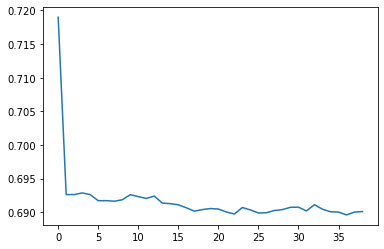

In [172]:
plt.plot(clf.history['loss'])


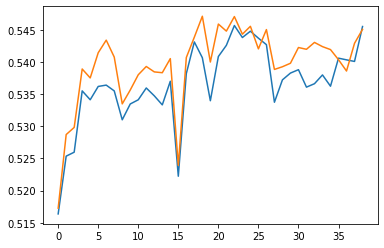

In [173]:
# plot auc
plt.plot(clf.history['train_auc'])
plt.plot(clf.history['valid_auc'])

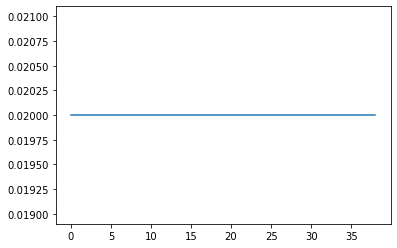

In [174]:
# plot learning rates
plt.plot(clf.history['lr'])

In [177]:
from sklearn.metrics import roc_auc_score

preds = clf.predict_proba(X_test)
test_auc = roc_auc_score(y_score=preds[:,1], y_true=y_test)


preds_valid = clf.predict_proba(X_valid)
valid_auc = roc_auc_score(y_score=preds_valid[:,1], y_true=y_valid)

print(f"BEST VALID SCORE FOR CHIP Validation : {clf.best_cost}")
print(f"FINAL TEST SCORE FOR CHIP Validation : {test_auc}")

BEST VALID SCORE FOR CHIP Validation : 0.5470927621565707
FINAL TEST SCORE FOR CHIP Validation : 0.5373497142927846
